<a href="https://colab.research.google.com/github/rafsanalhad/PCVK_17_Harafsan_Alhad/blob/main/Week10_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 10 – Thresholding, Segmentasi Sederhana**

1.  Import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [ ]:
!pip install pytesseract

In [ ]:
# Menginstal Tesseract OCR dengan dukungan bahasa Indonesia
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 2s (3,244 kB/s)
debconf: unable to ini

Mengimport Library Yang Diperlukan

In [ ]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

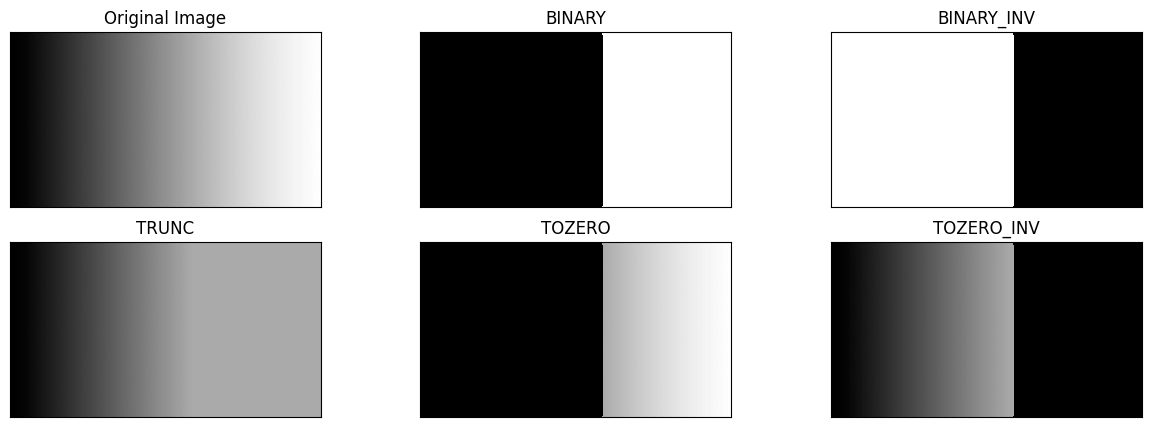

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/gradient.jpg')

img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255 #tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1 #tanpa library

#3. Threshold Truncate
thresh3[img>thresh] = thresh #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0 #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-6-b91e6df240ea>:16: RuntimeWarning: invalid value encountered in divide
  mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)


186


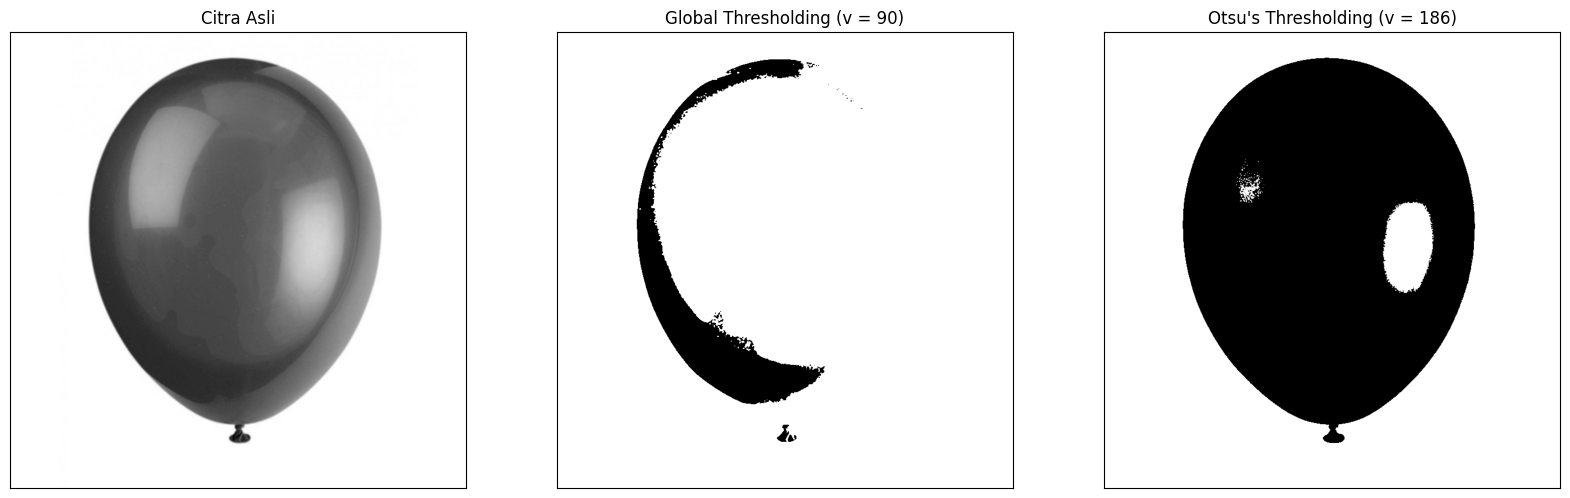

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/balloon.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
def otsu(gray):
  pixel_number = gray.shape[0] * gray.shape[1]
  mean_weight = 1.0/pixel_number
  his, bins = np.histogram(gray, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)
  for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight
    mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
    #print mub, muf
    value = Wb * Wf * (mub - muf) ** 2
    if value > final_value:
      final_thresh = t
      final_value = value
  final_img = gray.copy()
  print(final_thresh)
  final_img[gray > final_thresh] = 255
  final_img[gray < final_thresh] = 0
  return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv.threshold(blur,90,255,cv.THRESH_BINARY)
#ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20,15))
for i in range(len(citra3)):
  plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image **tobacco.jpg** yang sudah disediakan di folder images.

Petunjuk:

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset **None**, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking **warna putih** yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan **Citra Segment**).

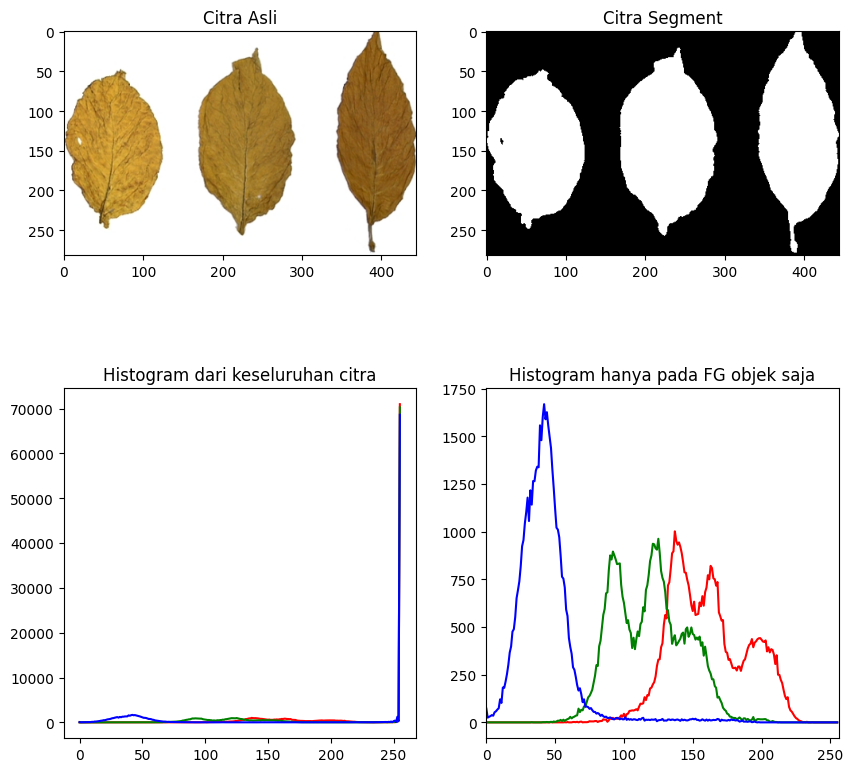

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/tobacco.jpg')

img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)


plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
  hist0 = cv.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])
plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

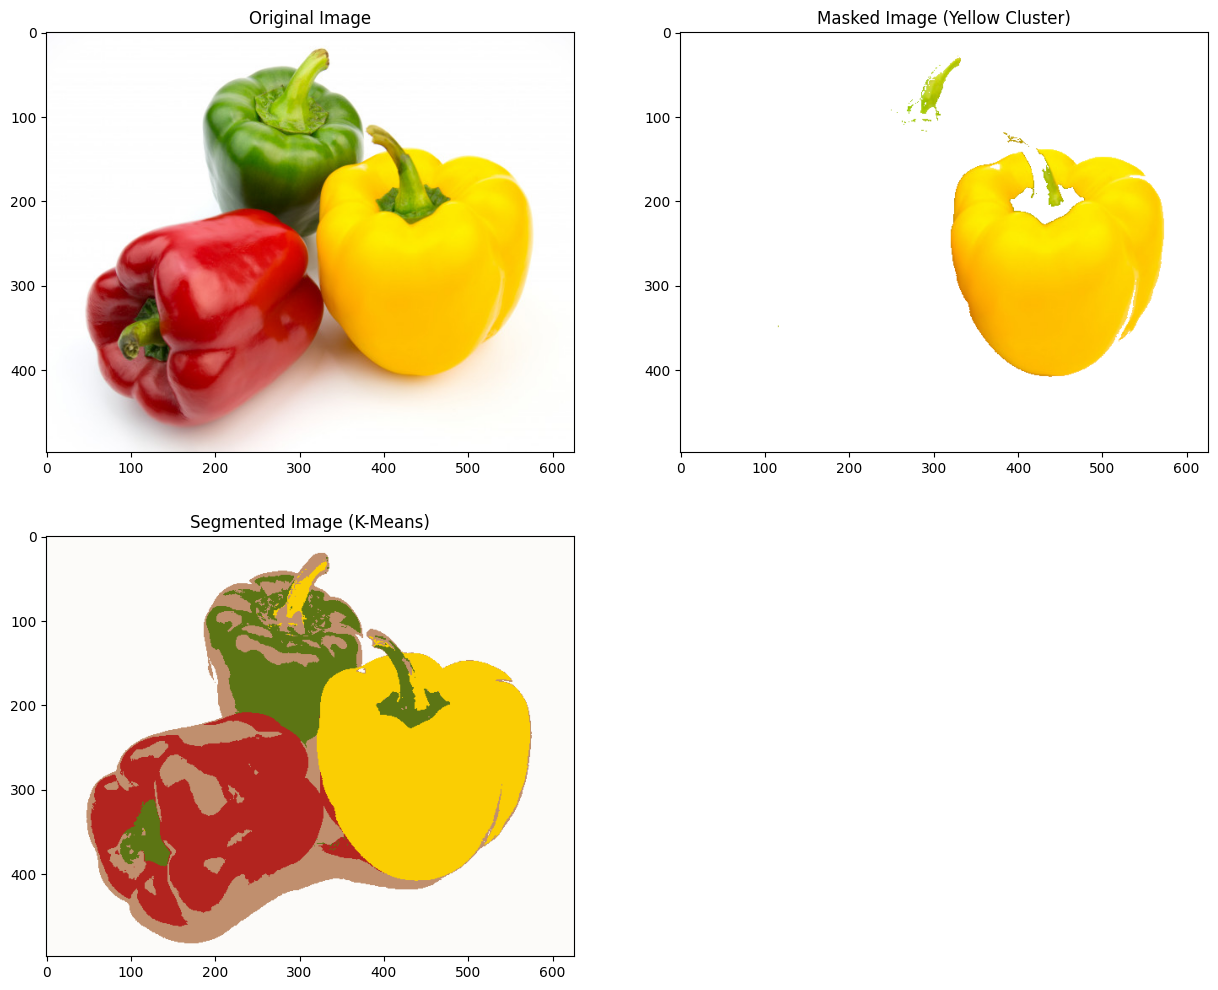

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
filename = '/content/drive/MyDrive/PCVK/peppers.jpg'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Flatten the image to a 2D array of pixels
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria for K-Means
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Number of clusters (k = 5)
k = 5
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert cluster centers to integer (RGB values)
centers = np.uint8(centers)

# Flatten labels array
labels = labels.flatten()

# Convert the pixels to the color of the cluster center
segmented_image = centers[labels]
segmented_image = segmented_image.reshape(img.shape)

# Create a mask to display only the yellow cluster
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))

# Find the cluster center closest to yellow ([255, 255, 0] in RGB)
yellow = np.array([255, 255, 0])
closest_cluster = np.argmin(np.linalg.norm(centers - yellow, axis=1))

# Set all pixels that are not in the yellow cluster to white
masked_image[labels != closest_cluster] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Display the original, masked, and segmented images
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image (Yellow Cluster)')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()


**Kendala yang Dihadapi Saat Menampilkan Warna Tertentu**

**Kuning Tidak Murni:**

* Warna kuning yang ada dalam gambar mungkin tidak murni kuning. Artinya, warna kuning bisa memiliki variasi spektrum yang lebih luas, seperti kuning terang, kuning kehijauan, atau kuning kecokelatan. Oleh karena itu, cluster yang dipilih mungkin mengandung variasi warna lain yang menyerupai kuning.

**Kesalahan Pemilihan Cluster:**

* Algoritma K-Means bekerja dengan cara mengelompokkan piksel berdasarkan jarak warna dalam ruang warna. Karena warna kuning dalam gambar mungkin memiliki nilai yang mendekati warna lain (seperti hijau atau oranye), cluster yang dihasilkan bisa mencakup beberapa warna yang tidak sepenuhnya kuning.

**Jumlah Cluster (k):**

* Pemilihan jumlah cluster k yang tepat menjadi penting. Jika k terlalu kecil, warna kuning bisa tercampur dengan warna lain, dan jika k terlalu besar, kita mungkin tidak mendapatkan cluster yang jelas berisi hanya warna kuning.

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.


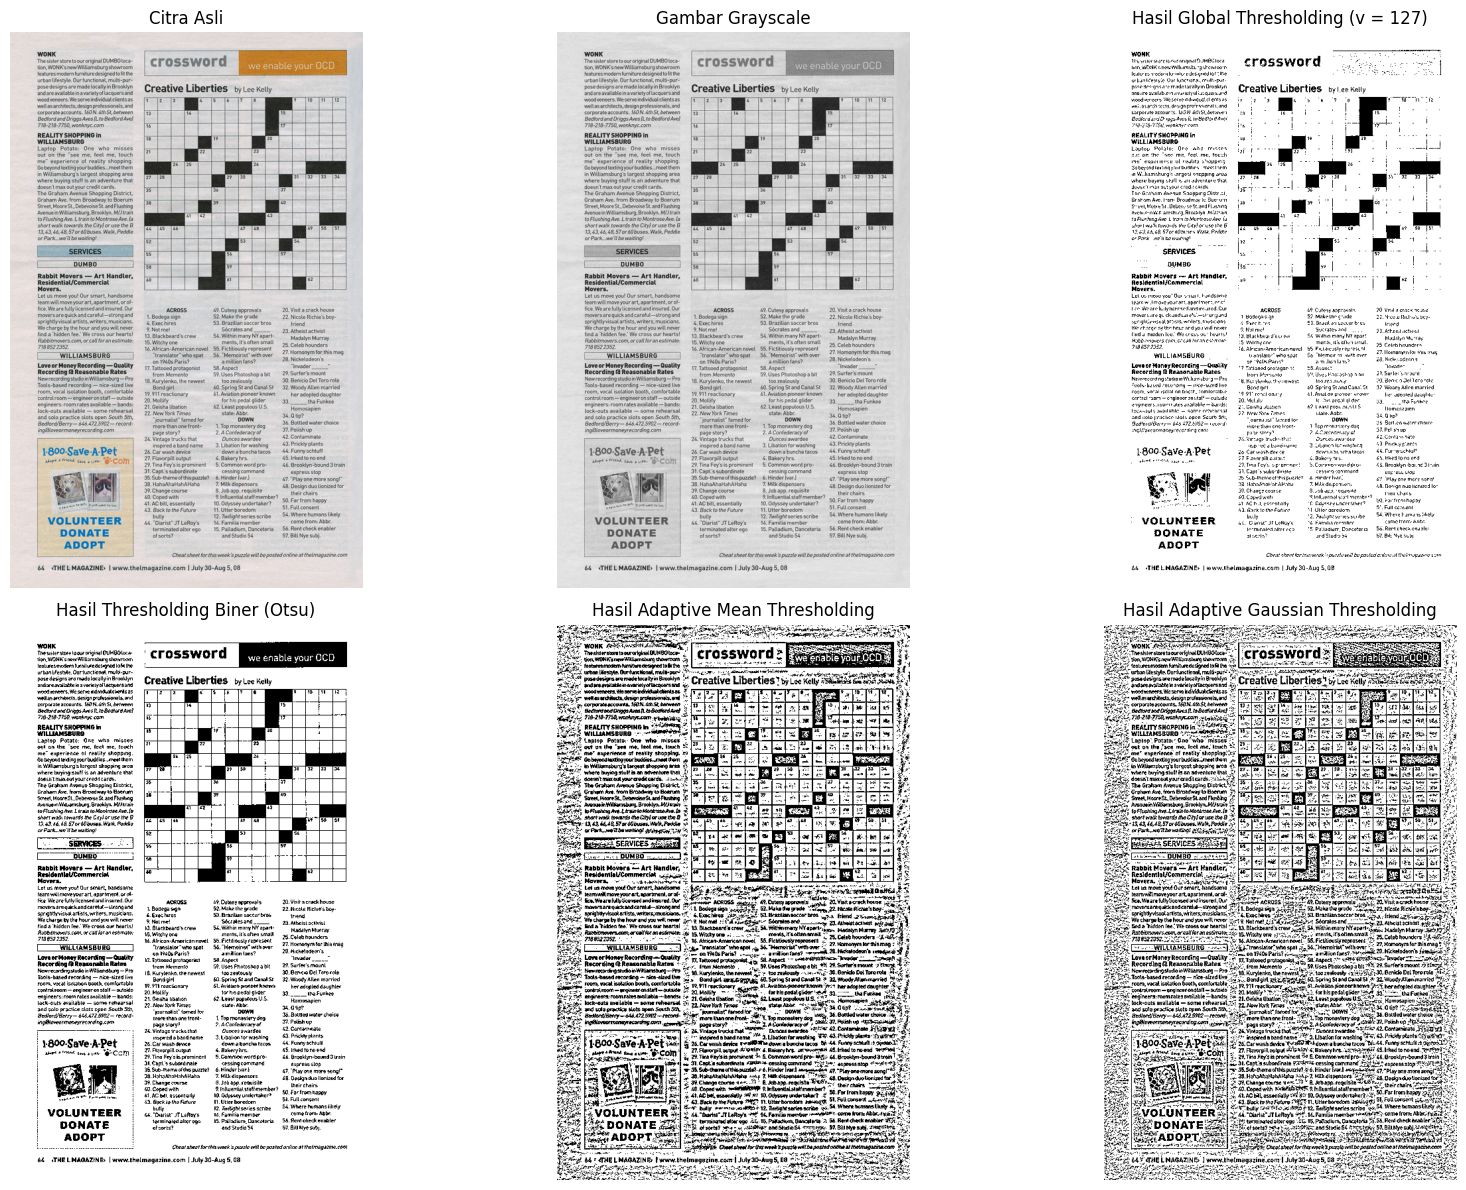

In [ ]:
# Path ke gambar
image_path = '/content/drive/MyDrive/PCVK/crossword.jpg'

# Membaca gambar
img = cv.imread(image_path)
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 1. Global Thresholding
ret_global, binary_threshold_global = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY)

# 2. Otsu's Thresholding
ret_otsu, binary_threshold_otsu = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# 3. Adaptive Mean Thresholding
adaptive_mean = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

# 4. Adaptive Gaussian Thresholding
adaptive_gaussian = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

# Menampilkan hasil untuk masing-masing metode
plt.figure(figsize=(18, 12))  # Memperbesar ukuran gambar

# Menampilkan gambar asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

# Plot Gambar Grayscale
plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

# Plot Hasil Global Thresholding
plt.subplot(2, 3, 3)
plt.imshow(binary_threshold_global, cmap='gray')
plt.title('Hasil Global Thresholding (v = 127)')
plt.axis('off')

# Plot Hasil Otsu's Thresholding
plt.subplot(2, 3, 4)
plt.imshow(binary_threshold_otsu, cmap='gray')
plt.title('Hasil Thresholding Biner (Otsu)')
plt.axis('off')

# Plot Hasil Adaptive Mean Thresholding
plt.subplot(2, 3, 5)
plt.imshow(adaptive_mean, cmap='gray')
plt.title('Hasil Adaptive Mean Thresholding')
plt.axis('off')

# Plot Hasil Adaptive Gaussian Thresholding
plt.subplot(2, 3, 6)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Hasil Adaptive Gaussian Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()


Berdasarkan beberapa percobaan dan hasil yang diperoleh, saya berpendapat bahwa metode thresholding yang paling efektif adalah Otsu's thresholding. Gambar yang dihasilkan tampak jelas tanpa adanya noise yang mengganggu.


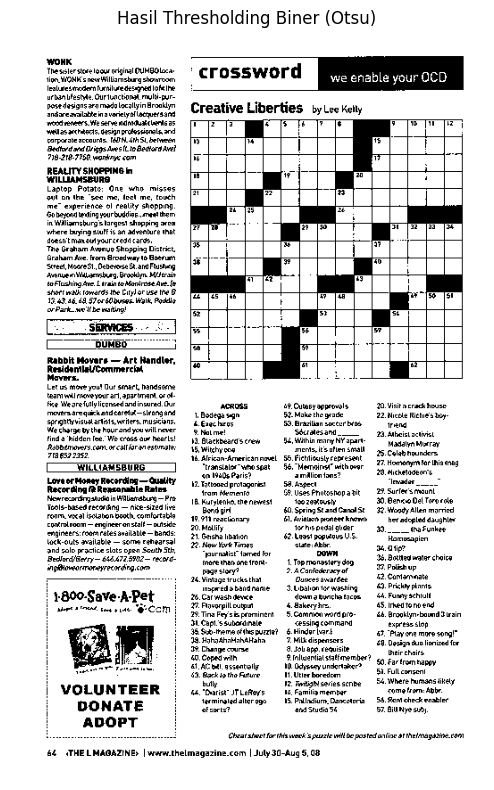

In [ ]:
# Menggunakan gambar yang sudah ada sebelumnya
image = cv.imread('/content/drive/MyDrive/PCVK/crossword.jpg')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Menggunakan Otsu's thresholding
ret_otsu, binary_threshold_otsu = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Menampilkan gambar asli dan hasil segmentasi
plt.figure(figsize=(12, 8))  # Memperbesar ukuran gambar

# # Menampilkan gambar asli
# plt.subplot(1, 2, 1)
# plt.imshow(gray_image, cmap='gray')
# plt.title('Gambar Grayscale')
# plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_threshold_otsu, cmap='gray')
plt.title('Hasil Thresholding Biner (Otsu)')
plt.axis('off')

plt.tight_layout()
plt.show()
